<a href="https://colab.research.google.com/github/luckyswaminathan/AVAXtokenomicsModelling/blob/main/AVAXtokenomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm, gaussian_kde
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
df = pd.read_csv('P-chain_complexities.csv')
df.columns = ['blockId', 'BlkHeight', 'BlkTimestamp', 'Bandwidth_Complexity', 'UTXOsRead_Complexity', 'UTXOsWrite_Complexity', 'Compute_Complexity']

condition = (df['Bandwidth_Complexity'] == 0) & (df['UTXOsRead_Complexity'] == 0) & \
            (df['UTXOsWrite_Complexity'] == 0) & (df['Compute_Complexity'] == 0)


df = df[~condition]

df = df.drop(['blockId', 'BlkHeight', 'BlkTimestamp'], axis=1)

print(df.head())

   Bandwidth_Complexity  UTXOsRead_Complexity  UTXOsWrite_Complexity  \
0                  1738                   612                    612   
2                   505                   102                    196   
3                   337                    90                    172   
4                   770                   204                    298   
6                  1830                   612                    706   

   Compute_Complexity  
0                6000  
2                1000  
3                1000  
4                2000  
6                6000  


In [ ]:
print(df.head())

   Bandwidth_Complexity  UTXOsRead_Complexity  UTXOsWrite_Complexity  \
0                  1738                   612                    612   
2                   505                   102                    196   
3                   337                    90                    172   
4                   770                   204                    298   
6                  1830                   612                    706   

   Compute_Complexity  
0                6000  
2                1000  
3                1000  
4                2000  
6                6000  


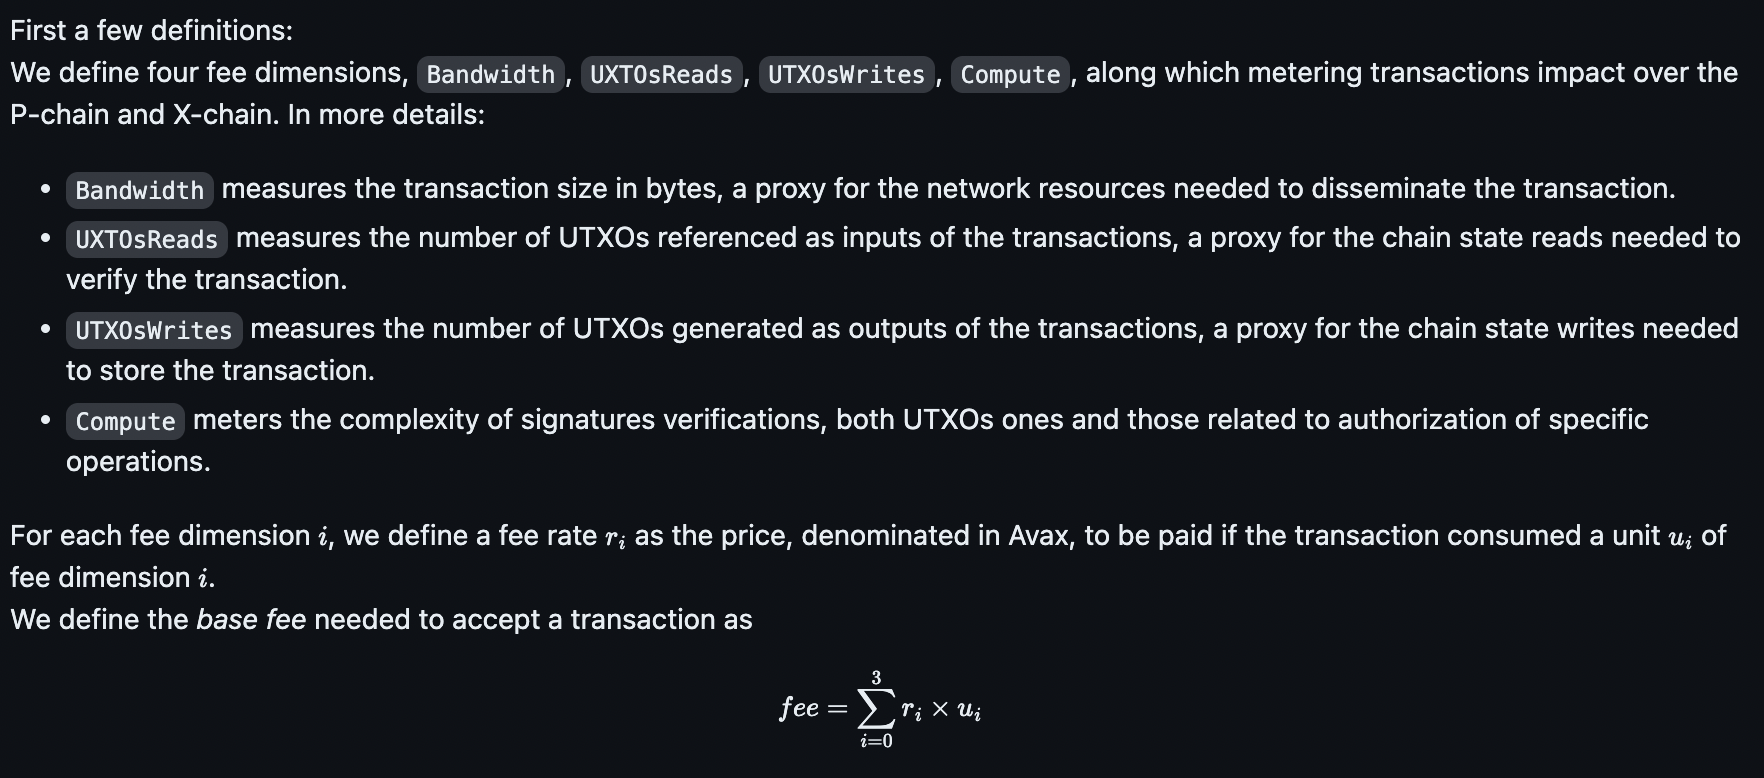

Base Fee Optimization method


In [ ]:
def calculate_fee(r1, bandwidth, r2, utxoReads, r3, utxoWrites, r4, compute):
  fee = r1*bandwidth + r2*utxoReads + r3*utxoWrites + r4*compute
  return fee

fee vs bandwidth


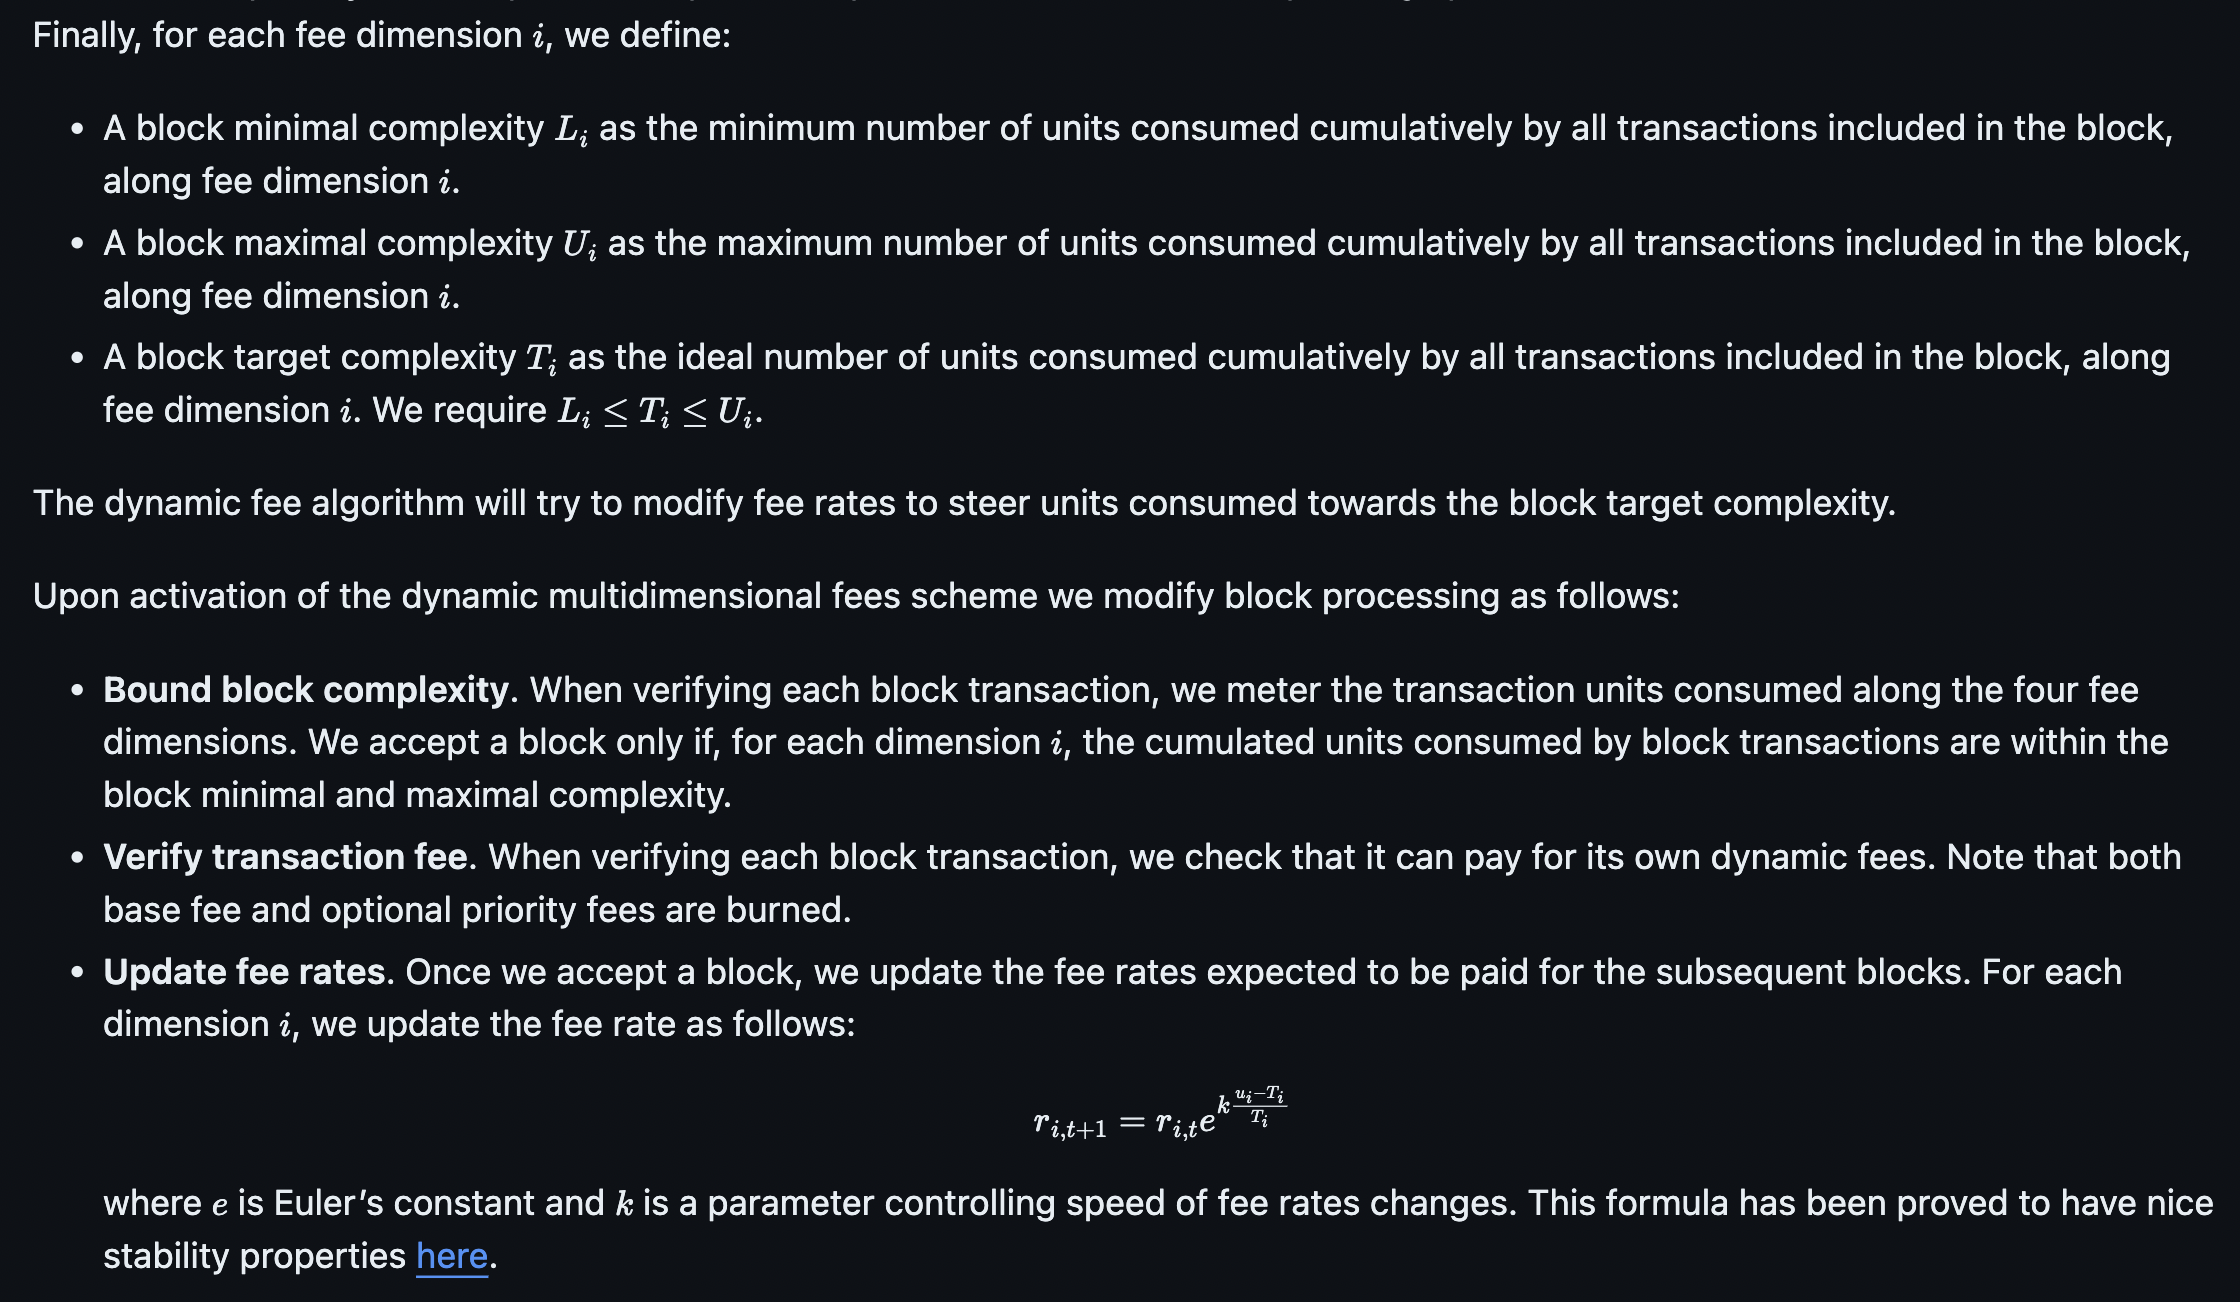

In [ ]:

def update_fee_rate(current_rate, k, units_used, target_units):
    try:
        exp = math.e ** (k * (units_used - target_units) / target_units)
        updated_rate = current_rate ** exp
        return updated_rate
    except OverflowError:
        # Handle the overflow case, perhaps by setting a maximum value
        return float('inf')

In [ ]:
## parameters

initial_rates = {
    'rate_bandwidth': 0.05,
    'rate_utxos_reads': 0.02,
    'rate_utxos_writes': 0.03,
    'rate_compute': 0.04
}

target_units = {
    'bandwidth': 900,
    'utxos_reads': 300,
    'utxos_writes': 350,
    'compute': 3000
}
rates_bandwidth = [initial_rates['rate_bandwidth']]
rates_utxos_reads = [initial_rates['rate_utxos_reads']]
rates_utxos_writes = [initial_rates['rate_utxos_writes']]
rates_compute = [initial_rates['rate_compute']]
k = 0.05



In [ ]:
def update_fee_rate(current_rate, k, used, target):
    """Apply the rate adjustment formula."""
    try:
        factor = np.exp(k * (used - target) / target)
        new_rate = current_rate * factor
        return new_rate
    except OverflowError:
        return float('inf')


initial_rates = {
    'Bandwidth_Complexity': 0.05,
    'UTXOsRead_Complexity': 0.02,
    'UTXOsWrite_Complexity': 0.03,
    'Compute_Complexity': 0.04
}
targets = {
    'Bandwidth_Complexity': 900,
    'UTXOsRead_Complexity': 300,
    'UTXOsWrite_Complexity': 350,
    'Compute_Complexity': 3000
}
num_simulations = 1000
rate_adjustment_factor = 0.01

results = []

def simulate_fee_adjustments(df, num_simulations, k, initial_rates, targets):
    results = []
    for _ in range(num_simulations):
        rates = initial_rates.copy()
        for column in df.columns:
            used = df[column].sum()
            rates[column] = update_fee_rate(rates[column], k, used, targets[column])

        results.append(rates)
    return results


initial_rates = {
    'Bandwidth_Complexity': 0.05,
    'UTXOsRead_Complexity': 0.02,
    'UTXOsWrite_Complexity': 0.03,
    'Compute_Complexity': 0.04
}
targets = {
    'Bandwidth_Complexity': 900,
    'UTXOsRead_Complexity': 300,
    'UTXOsWrite_Complexity': 350,
    'Compute_Complexity': 3000
}
num_simulations = 1000



# Run the simulation
simulation_results = simulate_fee_adjustments(df, num_simulations, 0.05, initial_rates, targets)

In [ ]:
print(simulation_results)

[{'Bandwidth_Complexity': 3.275125176362005e+155, 'UTXOsRead_Complexity': 2.8475465574147475e+153, 'UTXOsWrite_Complexity': 8.929664059508874e+151, 'Compute_Complexity': 2.529064997078202e+156}, {'Bandwidth_Complexity': 3.275125176362005e+155, 'UTXOsRead_Complexity': 2.8475465574147475e+153, 'UTXOsWrite_Complexity': 8.929664059508874e+151, 'Compute_Complexity': 2.529064997078202e+156}, {'Bandwidth_Complexity': 3.275125176362005e+155, 'UTXOsRead_Complexity': 2.8475465574147475e+153, 'UTXOsWrite_Complexity': 8.929664059508874e+151, 'Compute_Complexity': 2.529064997078202e+156}, {'Bandwidth_Complexity': 3.275125176362005e+155, 'UTXOsRead_Complexity': 2.8475465574147475e+153, 'UTXOsWrite_Complexity': 8.929664059508874e+151, 'Compute_Complexity': 2.529064997078202e+156}, {'Bandwidth_Complexity': 3.275125176362005e+155, 'UTXOsRead_Complexity': 2.8475465574147475e+153, 'UTXOsWrite_Complexity': 8.929664059508874e+151, 'Compute_Complexity': 2.529064997078202e+156}, {'Bandwidth_Complexity': 3.27

In [ ]:
# Example of how to analyze the results
average_rates = {key: np.mean([result[key] for result in simulation_results]) for key in initial_rates}
print("Average rates after simulation:", average_rates)


Average rates after simulation: {'Bandwidth_Complexity': 3.2751251763620043e+155, 'UTXOsRead_Complexity': 2.8475465574147467e+153, 'UTXOsWrite_Complexity': 8.929664059508876e+151, 'Compute_Complexity': 2.529064997078202e+156}


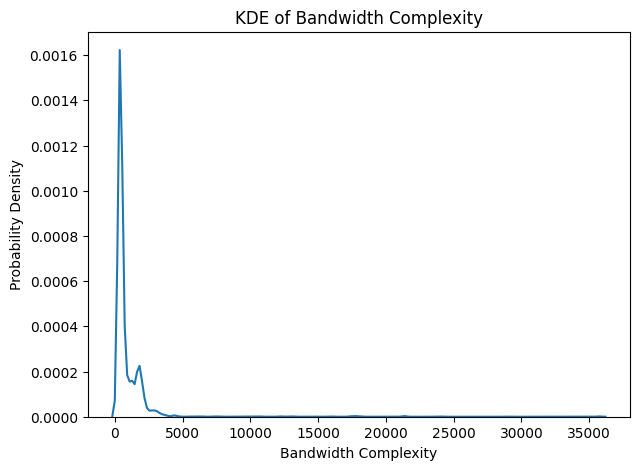

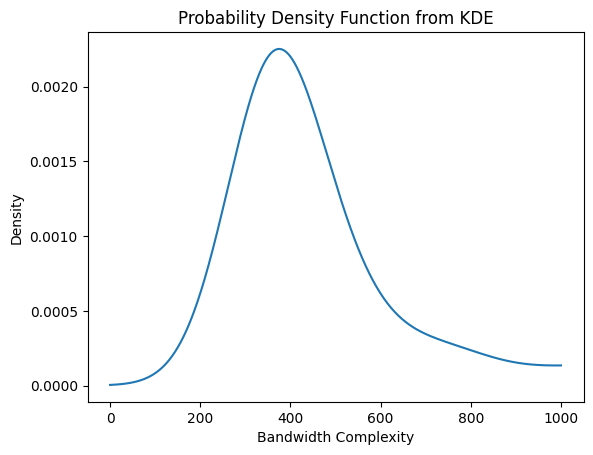

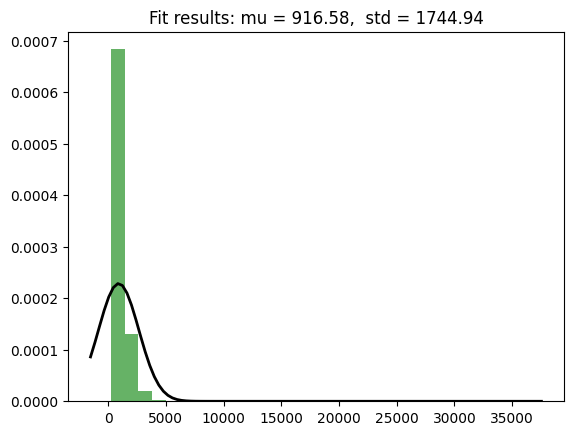

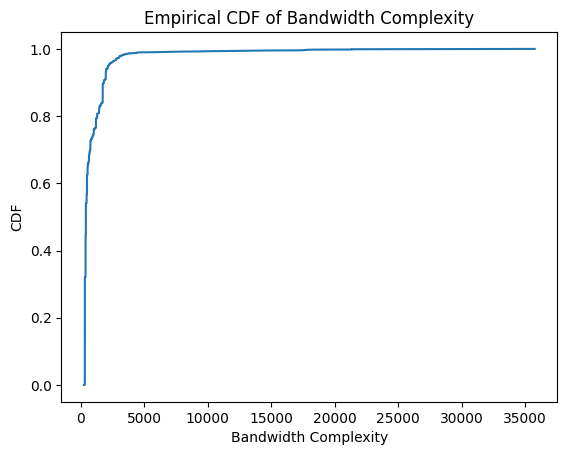

In [ ]:
plt.figure(figsize=(7, 5))

data = df['Bandwidth_Complexity']

# Create KDE plot
sns.kdeplot(data, bw_adjust=0.5)  # Adjust bandwidth to control smoothness
plt.title('KDE of Bandwidth Complexity')
plt.xlabel('Bandwidth Complexity')
plt.ylabel('Probability Density')
plt.show()

# Fit KDE
density = gaussian_kde(data)
density.set_bandwidth(bw_method=density.factor / 3.)  # Optional: adjust bandwidth

# Evaluate density on a set of points
points = np.linspace(0, 1000, 500)
probability_density = density(points)

# Plot the result
plt.plot(points, probability_density)
plt.title('Probability Density Function from KDE')
plt.xlabel('Bandwidth Complexity')
plt.ylabel('Density')
plt.show()

# Fit a normal distribution to the data
mu, std = norm.fit(data)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Create an empirical CDF
ecdf = ECDF(data)

# Plot the CDF
plt.plot(ecdf.x, ecdf.y)
plt.title('Empirical CDF of Bandwidth Complexity')
plt.xlabel('Bandwidth Complexity')
plt.ylabel('CDF')
plt.show()

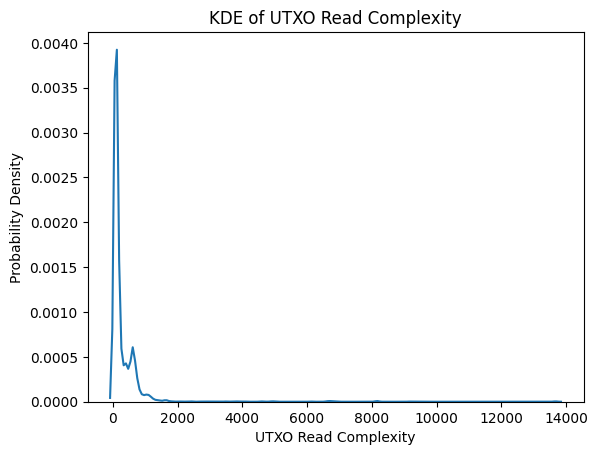

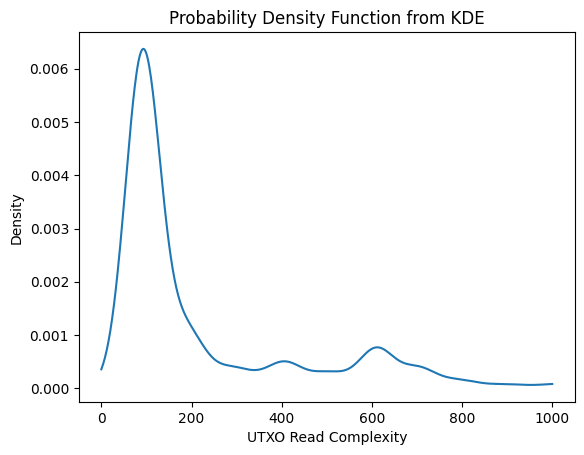

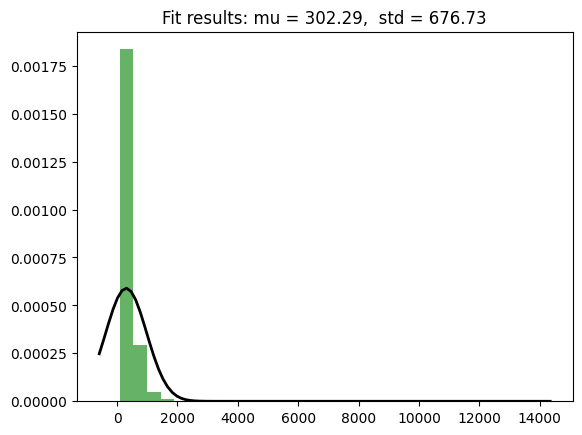

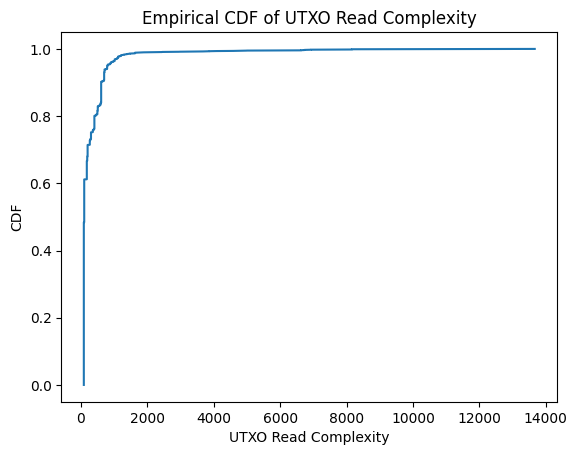

In [ ]:
data = df['UTXOsRead_Complexity']

# Create KDE plot
sns.kdeplot(data, bw_adjust=0.5)  # Adjust bandwidth to control smoothness
plt.title('KDE of UTXO Read Complexity')
plt.xlabel('UTXO Read Complexity')
plt.ylabel('Probability Density')
plt.show()

# Get KDE as a function
from scipy.stats import gaussian_kde

# Fit KDE
density = gaussian_kde(data)
density.set_bandwidth(bw_method=density.factor / 3.)  # Optional: adjust bandwidth

# Evaluate density on a set of points
points = np.linspace(0, 1000, 500)
probability_density = density(points)

# Plot the result
plt.plot(points, probability_density)
plt.title('Probability Density Function from KDE')
plt.xlabel('UTXO Read Complexity')
plt.ylabel('Density')
plt.show()

mu, std = norm.fit(data)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Create an empirical CDF
ecdf = ECDF(data)

# Plot the CDF
plt.plot(ecdf.x, ecdf.y)
plt.title('Empirical CDF of UTXO Read Complexity')
plt.xlabel('UTXO Read Complexity')
plt.ylabel('CDF')
plt.show()

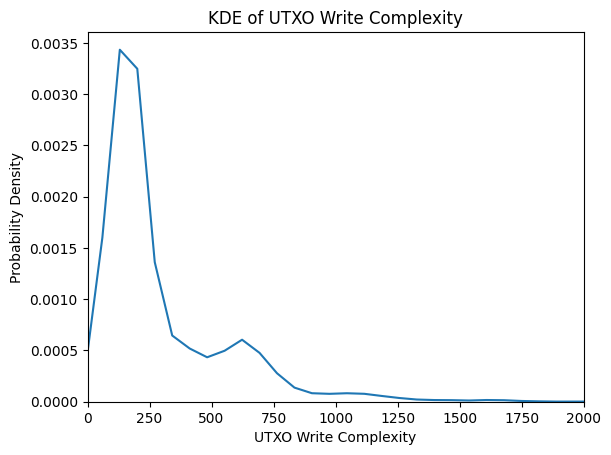

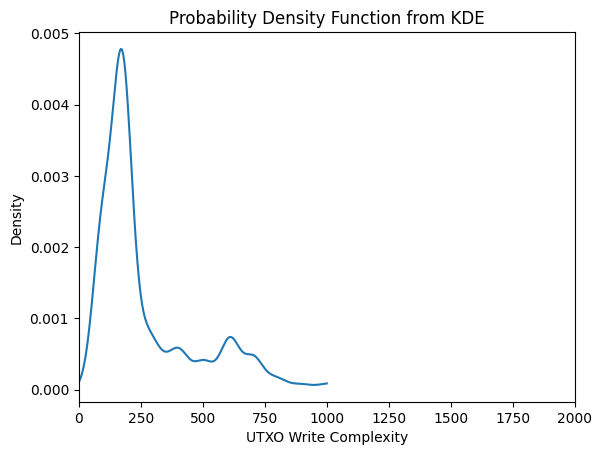

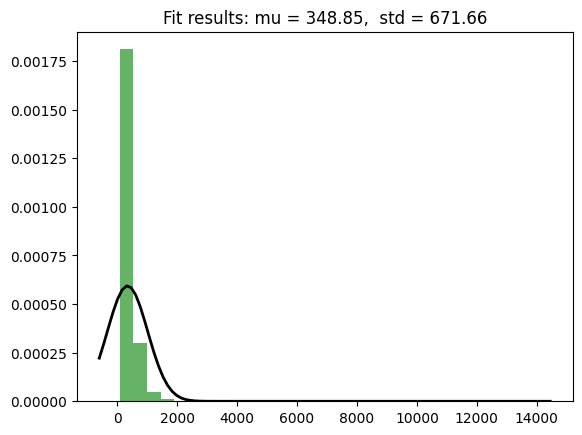

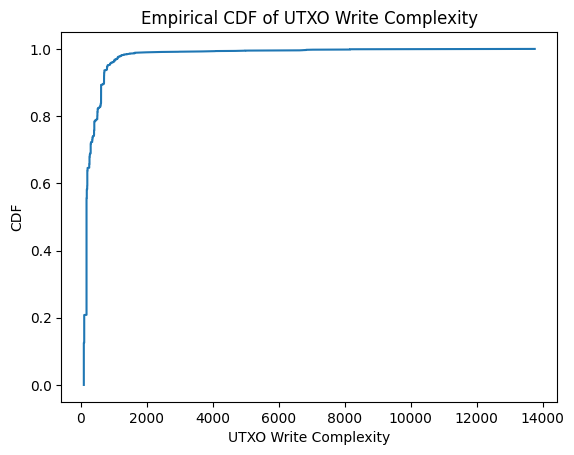

In [ ]:
data = df['UTXOsWrite_Complexity']

# Create KDE plot
sns.kdeplot(data, bw_adjust=0.5)  # Adjust bandwidth to control smoothness
plt.title('KDE of UTXO Write Complexity')
plt.xlabel('UTXO Write Complexity')
plt.ylabel('Probability Density')
plt.xlim(0,2000)
plt.show()


# Get KDE as a function
from scipy.stats import gaussian_kde

# Fit KDE
density = gaussian_kde(data)
density.set_bandwidth(bw_method=density.factor / 3.)  # Optional: adjust bandwidth

# Evaluate density on a set of points
points = np.linspace(0, 1000, 500)
probability_density = density(points)

# Plot the result
plt.plot(points, probability_density)
plt.title('Probability Density Function from KDE')
plt.xlabel('UTXO Write Complexity')
plt.ylabel('Density')
plt.xlim(0,2000)
plt.show()


mu, std = norm.fit(data)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Create an empirical CDF
ecdf = ECDF(data)

# Plot the CDF
plt.plot(ecdf.x, ecdf.y)
plt.title('Empirical CDF of UTXO Write Complexity')
plt.xlabel('UTXO Write Complexity')
plt.ylabel('CDF')
plt.show()

we can assert that all assets of these have very high standard deviations(close to 2x) of mean generally. In fact, the outliers have a very strong influence on means, with normal transaction complexity being relatively low.

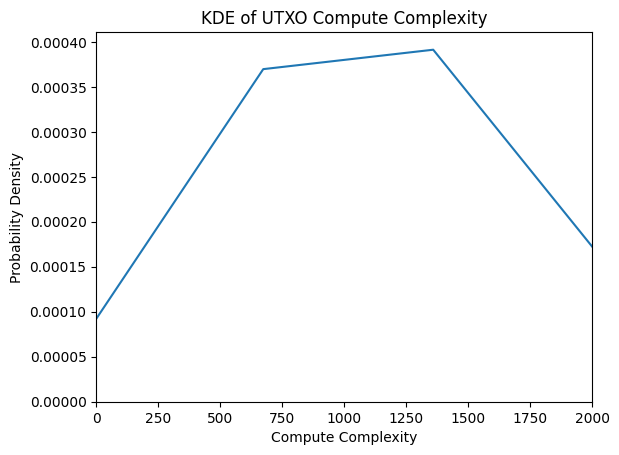

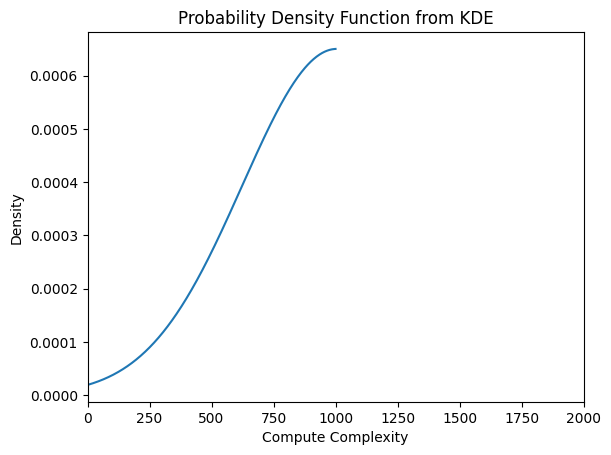

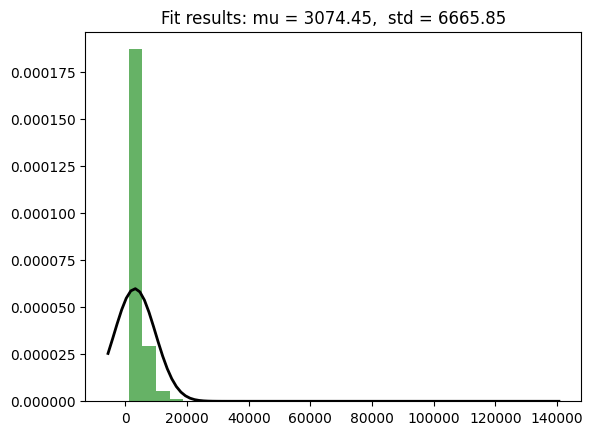

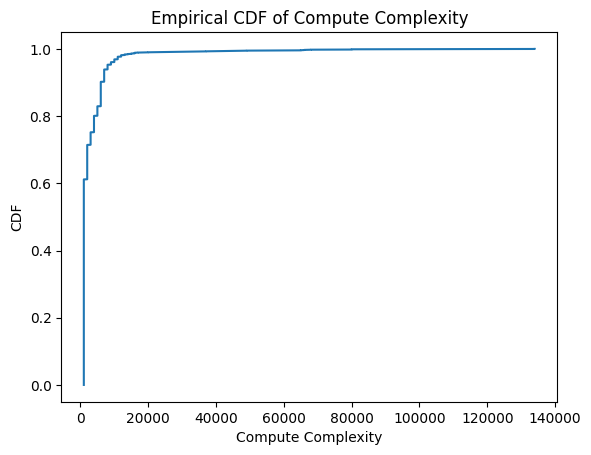

In [ ]:
data = df['Compute_Complexity']

# Create KDE plot
sns.kdeplot(data, bw_adjust=0.5)  # Adjust bandwidth to control smoothness
plt.title('KDE of UTXO Compute Complexity')
plt.xlabel('Compute Complexity')
plt.ylabel('Probability Density')
plt.xlim(0,2000)
plt.show()


# Get KDE as a function
from scipy.stats import gaussian_kde

# Fit KDE
density = gaussian_kde(data)
density.set_bandwidth(bw_method=density.factor / 3.)  # Optional: adjust bandwidth

# Evaluate density on a set of points
points = np.linspace(0, 1000, 500)
probability_density = density(points)

# Plot the result
plt.plot(points, probability_density)
plt.title('Probability Density Function from KDE')
plt.xlabel('Compute Complexity')
plt.ylabel('Density')
plt.xlim(0,2000)
plt.show()


mu, std = norm.fit(data)

# Plot the histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Create an empirical CDF
ecdf = ECDF(data)

# Plot the CDF
plt.plot(ecdf.x, ecdf.y)
plt.title('Empirical CDF of Compute Complexity')
plt.xlabel('Compute Complexity')
plt.ylabel('CDF')
plt.show()